'\n\nscharrx_filter = cv2.Scharr(image, ddepth=-1, dx=1, dy=0, scale=1, borderType=cv2.BORDER_DEFAULT)\ncv2.imshow("Scharr X Filter", scharrx_filter)\n\n\nscharry_filter = cv2.Scharr(image, ddepth=-1, dx=0, dy=1, scale=1, borderType=cv2.BORDER_DEFAULT)\ncv2.imshow("Scharr Y Filter", scharry_filter)\n\nscharr_filter = scharrx_filter + scharry_filter\ncv2.imshow("Scharr Filter", scharr_filter)\n\ncv2.waitKey(0)\ncv2.destroyAllWindows()\nplt.figure(figsize=(25,10))\nplt.xticks([]); plt.yticks([])\n'

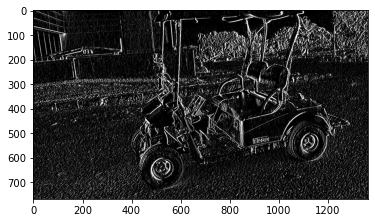

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
x=0
img = cv2.imread('carkyo.jpg')
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
scharrx = np.array([[ -3, 0, 3],

                   [-10, 0, 10],

                   [ -3, 0,  3]])

scharry = np.array([[ -3, 10, -3],

                   [0, 0, 0],

                   [ 3, 10, 3]])
#biggest = filtered_imagex.max()

filtered_imagex = cv2.filter2D(image, -1, scharrx)/255.0

filtered_imagey = (cv2.filter2D(image, -1, scharry))/255.0

#img_xy=np.sqrt(cv2.pow(filtered_imagex,2)+cv2.pow(filtered_imagey,2))
#plt.imshow(filtered_imagex, cmap='gray');

#plt.imshow(filtered_imagey, cmap='gray');

img_xy = np.sqrt( np.square(filtered_imagex) + np.square(filtered_imagex) )

plt.imshow(img_xy, cmap='gray');
"""

scharrx_filter = cv2.Scharr(image, ddepth=-1, dx=1, dy=0, scale=1, borderType=cv2.BORDER_DEFAULT)
cv2.imshow("Scharr X Filter", scharrx_filter)


scharry_filter = cv2.Scharr(image, ddepth=-1, dx=0, dy=1, scale=1, borderType=cv2.BORDER_DEFAULT)
cv2.imshow("Scharr Y Filter", scharry_filter)

scharr_filter = scharrx_filter + scharry_filter
cv2.imshow("Scharr Filter", scharr_filter)

cv2.waitKey(0)
cv2.destroyAllWindows()
plt.figure(figsize=(25,10))
plt.xticks([]); plt.yticks([])
"""


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('carkyo.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

gx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
gy = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, gx)
img_prewitty = cv2.filter2D(img_gaussian, -1, gy)

imxy=img_prewittx + img_prewitty

cv2.imshow("Prewitt", imxy)

cv2.waitKey(0)
cv2.destroyAllWindows()

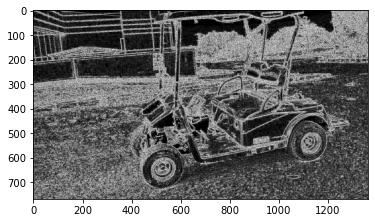

In [3]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

img = cv2.imread('carkyo.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)


robertv = np.array([[0,0,0],[0,1,0],[0,0,-1]])
roberth = np.array([[0,0,0],[0,0,1],[0,-1,0]])

vertical = ndimage.convolve(gray,robertv)
horizontal = ndimage.convolve(gray,roberth)

sqrh=np.square(horizontal)
sqrv=np.square(vertical)
sqrhv=sqrh + sqrv

filtered_img = np.sqrt( sqrhv )
filtered_img = np.asarray(np.clip(output,0,255), dtype="uint8")

plt.imshow(filtered_img, cmap='gray');